In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd 
property_df = pd.read_csv("Resources/Property_Sale.csv")
property_df.head()

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid
0,2018/09/02,NaN,Carlisle,Perth,WA,-31.981310,115.926284,3,house,WA3150,WA316
1,2018/09/02,NaN,Croydon,Melbourne,VIC,-37.781371,145.288317,4,house,VIC680,VIC207
2,2018/09/02,NaN,Forest Lake,Brisbane,QLD,-27.616542,152.957012,3,house,QLD1082,BRIS3
3,2018/09/02,NaN,Hastings,Melbourne,VIC,-38.293807,145.176725,3,house,VIC1136,VIC204
4,2018/09/02,NaN,Murrumbeena,Melbourne,VIC,-37.904081,145.065296,2,house,VIC1845,VIC177


In [2]:
property_df = property_df.rename(columns={"lat": "latitude", "lon": "longitude","loc_pid":"postcode"})
property_df.head()

,date_sold,price,suburb,city_name,state,latitude,longitude,bedrooms,property_type,postcode,lga_pid
0,2018/09/02,NaN,Carlisle,Perth,WA,-31.981310,115.926284,3,house,WA3150,WA316
1,2018/09/02,NaN,Croydon,Melbourne,VIC,-37.781371,145.288317,4,house,VIC680,VIC207
2,2018/09/02,NaN,Forest Lake,Brisbane,QLD,-27.616542,152.957012,3,house,QLD1082,BRIS3
3,2018/09/02,NaN,Hastings,Melbourne,VIC,-38.293807,145.176725,3,house,VIC1136,VIC204
4,2018/09/02,NaN,Murrumbeena,Melbourne,VIC,-37.904081,145.065296,2,house,VIC1845,VIC177


In [3]:
property_df = property_df.dropna()
property_df

,date_sold,price,suburb,city_name,state,latitude,longitude,bedrooms,property_type,postcode,lga_pid
8,2018/09/02,119500.0,Elizabeth Downs,Adelaide,SA,-34.700562,138.702346,3,house,SA385,SA98
9,2018/09/02,155500.0,Maylands,Perth,WA,-31.929227,115.898842,1,unit,WA3156,WA314
10,2018/09/02,170000.0,Armadale,Perth,WA,-32.143731,115.994765,3,house,WA3220,WA321
11,2018/09/02,200000.0,Stafford,Brisbane,QLD,-27.411872,153.006160,1,unit,QLD2717,BRIS2
12,2018/09/02,228500.0,Craigmore,Adelaide,SA,-34.693111,138.720609,3,house,SA316,SA98
...,...,...,...,...,...,...,...,...,...,...,...
489834,2021/03/30,3900000.0,Paddington,Sydney,NSW,-33.888121,151.230955,3,house,NSW3146,NSW200
489835,2021/03/30,4000000.0,Mosman,Sydney,NSW,-33.822517,151.235827,4,house,NSW2760,NSW232
489836,2021/03/30,4300000.0,Bondi Beach,Sydney,NSW,-33.885723,151.271758,5,house,NSW470,NSW175
489837,2021/03/30,4750000.0,Wahroonga,Sydney,NSW,-33.696993,151.130753,5,house,NSW3043,NSW258


In [4]:
df = property_df[(property_df['state'] == 'ACT')]
df

,date_sold,price,suburb,city_name,state,latitude,longitude,bedrooms,property_type,postcode,lga_pid
32,2018/09/02,595000.0,Braddon,Canberra,ACT,-35.265475,149.133592,3,unit,ACT106,ACT
183,2018/09/03,355000.0,Isabella Plains,Canberra,ACT,-35.423305,149.100917,1,townhouse,ACT612,ACT
195,2018/09/03,385000.0,Franklin,Canberra,ACT,-35.200089,149.148190,2,unit,ACT902,ACT
196,2018/09/03,390000.0,Gungahlin,Canberra,ACT,-35.186045,149.137101,2,unit,ACT710,ACT
211,2018/09/03,412500.0,Bruce,Canberra,ACT,-35.237535,149.093622,2,unit,ACT555,ACT
...,...,...,...,...,...,...,...,...,...,...,...
489582,2021/03/30,885000.0,Fadden,Canberra,ACT,-35.397083,149.117130,3,house,ACT605,ACT
489605,2021/03/30,927000.0,Monash,Canberra,ACT,-35.412517,149.087718,5,house,ACT603,ACT
489635,2021/03/30,983000.0,Lyneham,Canberra,ACT,-35.254631,149.131611,3,house,ACT101,ACT
489661,2021/03/30,1090000.0,Narrabundah,Canberra,ACT,-35.332523,149.149199,3,house,ACT218,ACT


In [5]:
df.drop(columns = ['suburb','lga_pid','city_name','state'], inplace=True)
df

c:\Users\JoshuaTean\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,date_sold,price,latitude,longitude,bedrooms,property_type,postcode
32,2018/09/02,595000.0,-35.265475,149.133592,3,unit,ACT106
183,2018/09/03,355000.0,-35.423305,149.100917,1,townhouse,ACT612
195,2018/09/03,385000.0,-35.200089,149.148190,2,unit,ACT902
196,2018/09/03,390000.0,-35.186045,149.137101,2,unit,ACT710
211,2018/09/03,412500.0,-35.237535,149.093622,2,unit,ACT555
...,...,...,...,...,...,...,...
489582,2021/03/30,885000.0,-35.397083,149.117130,3,house,ACT605
489605,2021/03/30,927000.0,-35.412517,149.087718,5,house,ACT603
489635,2021/03/30,983000.0,-35.254631,149.131611,3,house,ACT101
489661,2021/03/30,1090000.0,-35.332523,149.149199,3,house,ACT218


In [6]:
df.nunique()

date_sold          836
price             1898
latitude         10825
longitude        10795
bedrooms             6
property_type        3
postcode           109
dtype: int64

In [7]:
df['date_sold'] = pd.to_datetime(df['date_sold'])
df['month'] = df['date_sold'].apply(lambda date:date.month)
df['year'] = df['date_sold'].apply(lambda date:date.year)

c:\Users\JoshuaTean\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\JoshuaTean\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\JoshuaTean\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [8]:
df['postcode'] = df['postcode'].str.replace(r'\D', '').astype(int)

c:\Users\JoshuaTean\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
df

,date_sold,price,latitude,longitude,bedrooms,property_type,postcode,month,year
32,2018-09-02,595000.0,-35.265475,149.133592,3,unit,106,9,2018
183,2018-09-03,355000.0,-35.423305,149.100917,1,townhouse,612,9,2018
195,2018-09-03,385000.0,-35.200089,149.148190,2,unit,902,9,2018
196,2018-09-03,390000.0,-35.186045,149.137101,2,unit,710,9,2018
211,2018-09-03,412500.0,-35.237535,149.093622,2,unit,555,9,2018
...,...,...,...,...,...,...,...,...,...
489582,2021-03-30,885000.0,-35.397083,149.117130,3,house,605,3,2021
489605,2021-03-30,927000.0,-35.412517,149.087718,5,house,603,3,2021
489635,2021-03-30,983000.0,-35.254631,149.131611,3,house,101,3,2021
489661,2021-03-30,1090000.0,-35.332523,149.149199,3,house,218,3,2021


In [10]:
df['property_type'] = df['property_type'].replace('unit', 1)
df['property_type'] = df['property_type'].replace('townhouse', 2)
df['property_type'] = df['property_type'].replace('house', 3)

c:\Users\JoshuaTean\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\JoshuaTean\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\JoshuaTean\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

In [11]:
df = df.drop('date_sold', axis=1)

In [12]:
df

,price,latitude,longitude,bedrooms,property_type,postcode,month,year
32,595000.0,-35.265475,149.133592,3,1,106,9,2018
183,355000.0,-35.423305,149.100917,1,2,612,9,2018
195,385000.0,-35.200089,149.148190,2,1,902,9,2018
196,390000.0,-35.186045,149.137101,2,1,710,9,2018
211,412500.0,-35.237535,149.093622,2,1,555,9,2018
...,...,...,...,...,...,...,...,...
489582,885000.0,-35.397083,149.117130,3,3,605,3,2021
489605,927000.0,-35.412517,149.087718,5,3,603,3,2021
489635,983000.0,-35.254631,149.131611,3,3,101,3,2021
489661,1090000.0,-35.332523,149.149199,3,3,218,3,2021


In [13]:
# Split our preprocessed data into our features and target arrays
X = df.drop('price', axis=1).values
y = df['price'].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state = 50)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Scale the data
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))

In [15]:
# Model 1 - Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [16]:
print(regressor.intercept_)
print(regressor.coef_)

679992.0898927761
[  15591.85299711   37264.38447593  196166.02307505   54668.94234167
 -122113.70503959   18258.17990416   40815.3926822 ]


In [17]:
y_pred = regressor.predict(X_test)

In [18]:
coeff_df = pd.DataFrame(regressor.coef_, df.drop('price',axis =1).columns, columns=['Coefficient']) 
coeff_df

,Coefficient
latitude,15591.852997
longitude,37264.384476
bedrooms,196166.023075
property_type,54668.942342
postcode,-122113.705040
month,18258.179904
year,40815.392682


In [19]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(10)

,Actual,Predicted
0,500000.0,5.562774e+05
1,415000.0,5.558371e+05
2,1700000.0,1.031199e+06
3,680000.0,8.317166e+05
4,355000.0,3.854727e+05
5,400000.0,3.957329e+05
6,460000.0,5.204680e+05
7,330000.0,3.920151e+05
8,609000.0,7.702923e+05
9,530000.0,4.830609e+05


In [20]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 132944.42476098204
MSE: 37424819461.936844
RMSE: 193454.954606846
VarScore: 0.575183846564566


In [21]:
# Model 2 - Keras Regression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [22]:
model = Sequential()
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')

In [23]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=120,epochs=400)

Epoch 1/400
102/102 [==============================] - 1s 3ms/step - loss: 578830073856.0000 - val_loss: 533343961088.0000
Epoch 2/400
102/102 [==============================] - 0s 2ms/step - loss: 578774564864.0000 - val_loss: 533152759808.0000
Epoch 3/400
102/102 [==============================] - 0s 2ms/step - loss: 577728020480.0000 - val_loss: 530333958144.0000
Epoch 4/400
102/102 [==============================] - 0s 1ms/step - loss: 569070256128.0000 - val_loss: 512352124928.0000
Epoch 5/400
102/102 [==============================] - 0s 2ms/step - loss: 530026790912.0000 - val_loss: 446474190848.0000
Epoch 6/400
102/102 [==============================] - 0s 2ms/step - loss: 422472515584.0000 - val_loss: 300596887552.0000
Epoch 7/400
102/102 [==============================] - 0s 2ms/step - loss: 251343962112.0000 - val_loss: 139650416640.0000
Epoch 8/400
102/102 [==============================] - 0s 1ms/step - loss: 129734246400.0000 - val_loss: 77946535936.0000
Epoch 9/400
102/1

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 64        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 361
Trainable params: 361
Non-trainable params: 0
__________________________________________________________

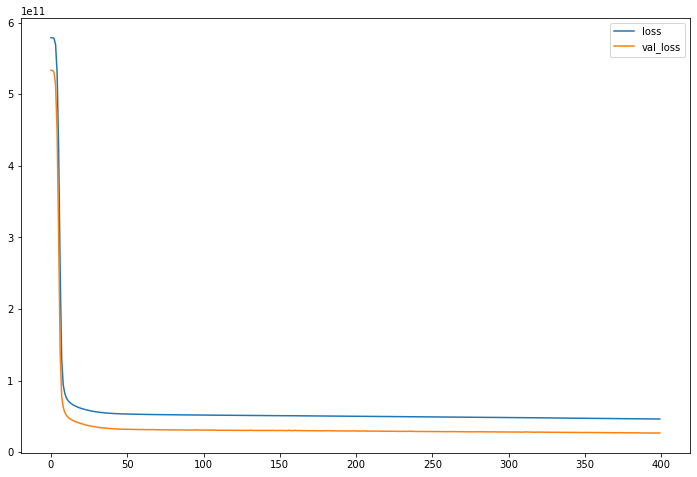

In [24]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

MAE: 105160.75489457832
MSE: 26696349075.46474
RMSE: 163390.17435410473
VarScore: 0.6971398962117754


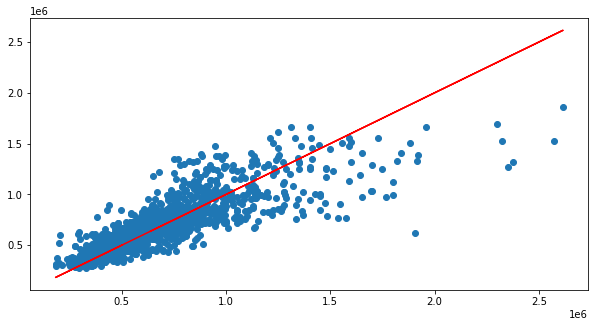

In [25]:
y_pred = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [26]:
df_pred = pd.DataFrame(y_pred, columns = ['Predicted'])
df_actual = pd.DataFrame(y_test, columns = ['Actual'])

In [27]:
df2 = pd.concat([df_actual, df_pred], axis=1)
df2.head(10)

,Actual,Predicted
0,500000.0,5.027127e+05
1,415000.0,4.994457e+05
2,1700000.0,1.285180e+06
3,680000.0,7.312132e+05
4,355000.0,3.791959e+05
5,400000.0,3.616946e+05
6,460000.0,4.172021e+05
7,330000.0,4.976125e+05
8,609000.0,7.110024e+05
9,530000.0,5.333807e+05
